# **Preparation**
Within preparation we'll install PyDrive, to connect our drive with Google Colaboratory. Then we mount our drive in Google Colaboratory, so we can access our file from drive in Google Colaboratory. After that we should create directory, where our file or data was saved. After finished it, we can import the libraries we need like numpy, pandas, matplotlib, etc.

In [1]:
#Install Python Drive
!pip install -U -q PyDrive

In [2]:
#Mount drive dengan Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Create directory pada FGA_Data_Science
%cd /content/drive/My Drive/FGA_Data_Science

/content/drive/My Drive/FGA_Data_Science


In [4]:
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd
import numpy as np

import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def last_8chars(x):
    return(x[-8:])

# **Load Data**
Here we'll concat our data, save it as new csv data. After that, we'll load our data and save it as dataframe. We'll try to get some insight from export in Indonesia. The last data was updated 3 months ago. We get the data from https://statistik.kemendag.go.id/export-import

In [6]:
# Read all data in directory
files = sorted([file for file in os.listdir('./Resource')], key=last_8chars)

all_years_data = pd.DataFrame()
years = 2012

# Load all data
for file in files:
    print(file)
    df = pd.read_csv('./Resource/'+file)
    all_years_data = pd.concat([all_years_data, df])
    
all_years_data.reset_index(inplace=True)
all_years_data.drop('index', axis=1, inplace=True)
all_years_data.rename(columns={'Tahun':'Bulan'}, inplace=True)
all_years_data.head(15)

Ekspor Indonesia Tahun 2012.csv
Ekspor Indonesia Tahun 2013.csv
Ekspor Indonesia Tahun 2014.csv
Ekspor Indonesia Tahun 2015.csv
Ekspor Indonesia Tahun 2016.csv
Ekspor Indonesia Tahun 2017.csv
Ekspor Indonesia Tahun 2018.csv
Ekspor Indonesia Tahun 2019.csv
Ekspor Indonesia Tahun 2020.csv


,Bulan,Total,MIGAS,NON MIGAS,Agriculture,Industry,Mining,Others
0,Januari,"15,568.06","3,142.63","12,425.43",221.47,"9,549.59","2,653.79",0.57
1,Februari,"15,695.44","3,355.48","12,339.96",250.95,"9,607.61","2,480.69",0.72
2,Maret,"17,251.52","3,486.10","13,765.42",248.48,"10,491.95","3,024.31",0.69
3,April,"16,173.19","3,560.73","12,612.46",221.99,"9,431.60","2,958.06",0.80
4,Mei,"16,829.55","3,724.89","13,104.66",286.61,"9,804.05","3,013.45",0.55
5,Juni,"15,441.46","2,899.67","12,541.79",282.11,"9,868.83","2,390.10",0.74
6,Juli,"16,085.08","2,919.69","13,165.39",372.26,"10,473.95","2,318.41",0.77
7,Agustus,"14,047.01","2,783.05","11,263.96",286.69,"8,830.38","2,146.38",0.51
8,September,"15,898.12","2,770.49","13,127.62",431.36,"10,425.31","2,270.29",0.66
9,Oktober,"15,319.99","2,650.57","12,669.42",385.59,"9,758.87","2,524.57",0.39


In [7]:
a =[]
x = 1
year = 2012
for i in all_years_data['Bulan']:
    a.append(year)
    x = x+1
    if x > 12:
        x=1
        year=year+1

all_years_data.insert(loc=1, column='Tahun', value=a)
all_years_data.head(15)

,Bulan,Tahun,Total,MIGAS,NON MIGAS,Agriculture,Industry,Mining,Others
0,Januari,2012,"15,568.06","3,142.63","12,425.43",221.47,"9,549.59","2,653.79",0.57
1,Februari,2012,"15,695.44","3,355.48","12,339.96",250.95,"9,607.61","2,480.69",0.72
2,Maret,2012,"17,251.52","3,486.10","13,765.42",248.48,"10,491.95","3,024.31",0.69
3,April,2012,"16,173.19","3,560.73","12,612.46",221.99,"9,431.60","2,958.06",0.80
4,Mei,2012,"16,829.55","3,724.89","13,104.66",286.61,"9,804.05","3,013.45",0.55
5,Juni,2012,"15,441.46","2,899.67","12,541.79",282.11,"9,868.83","2,390.10",0.74
6,Juli,2012,"16,085.08","2,919.69","13,165.39",372.26,"10,473.95","2,318.41",0.77
7,Agustus,2012,"14,047.01","2,783.05","11,263.96",286.69,"8,830.38","2,146.38",0.51
8,September,2012,"15,898.12","2,770.49","13,127.62",431.36,"10,425.31","2,270.29",0.66
9,Oktober,2012,"15,319.99","2,650.57","12,669.42",385.59,"9,758.87","2,524.57",0.39


In [8]:
all_years_data.to_csv('ekspor2012-2020.csv', index=False)

In [9]:
# Read new dataset
df = pd.read_csv('./ekspor2012-2020.csv')
df.head()

,Bulan,Tahun,Total,MIGAS,NON MIGAS,Agriculture,Industry,Mining,Others
0,Januari,2012,"15,568.06","3,142.63","12,425.43",221.47,"9,549.59","2,653.79",0.57
1,Februari,2012,"15,695.44","3,355.48","12,339.96",250.95,"9,607.61","2,480.69",0.72
2,Maret,2012,"17,251.52","3,486.10","13,765.42",248.48,"10,491.95","3,024.31",0.69
3,April,2012,"16,173.19","3,560.73","12,612.46",221.99,"9,431.60","2,958.06",0.80
4,Mei,2012,"16,829.55","3,724.89","13,104.66",286.61,"9,804.05","3,013.45",0.55


# **Data Pre-Processing**
We will pre-process the data to check if there are some errors in our data such as missing values, errors formatting, etc.

In [10]:
df.isnull().values.any()

False

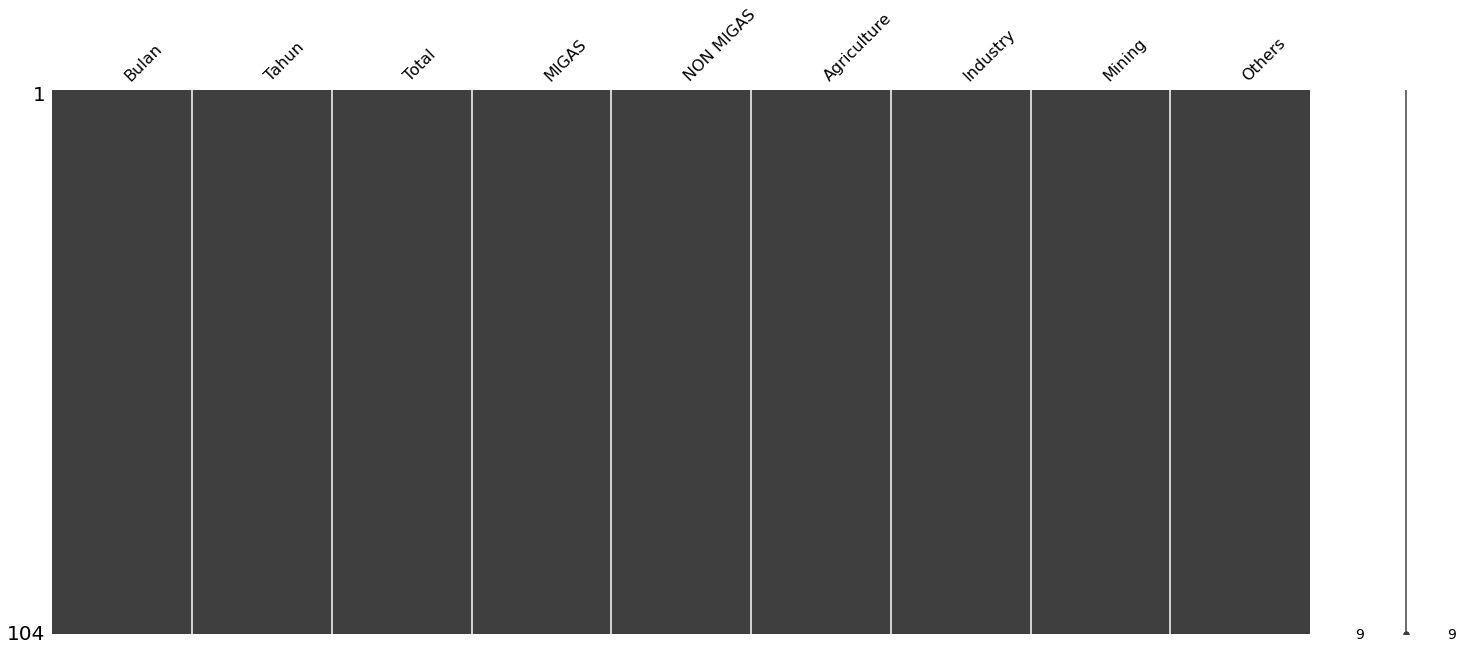

In [11]:
msno.matrix(df)

In [12]:
# Delete unused column
df.drop('NON MIGAS', axis=1, inplace=True)
df.rename(columns = {'MIGAS': 'Migas'}, inplace=True)
df.head()

,Bulan,Tahun,Total,Migas,Agriculture,Industry,Mining,Others
0,Januari,2012,"15,568.06","3,142.63",221.47,"9,549.59","2,653.79",0.57
1,Februari,2012,"15,695.44","3,355.48",250.95,"9,607.61","2,480.69",0.72
2,Maret,2012,"17,251.52","3,486.10",248.48,"10,491.95","3,024.31",0.69
3,April,2012,"16,173.19","3,560.73",221.99,"9,431.60","2,958.06",0.80
4,Mei,2012,"16,829.55","3,724.89",286.61,"9,804.05","3,013.45",0.55


In [13]:
df.shape

(104, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bulan        104 non-null    object 
 1   Tahun        104 non-null    int64  
 2   Total        104 non-null    object 
 3   Migas        104 non-null    object 
 4   Agriculture  104 non-null    float64
 5   Industry     104 non-null    object 
 6   Mining       104 non-null    object 
 7   Others       104 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.6+ KB


In [15]:
df['Tahun'] = df['Tahun'].astype('object')

In [16]:
convert_col = ['Total', 'Migas','Industry','Mining']

for col in convert_col:
    df[col] = df[col].str.replace(',','').astype(np.float64)
    #df[col].astype(float, inplace=True)

df.head()

,Bulan,Tahun,Total,Migas,Agriculture,Industry,Mining,Others
0,Januari,2012,15568.06,3142.63,221.47,9549.59,2653.79,0.57
1,Februari,2012,15695.44,3355.48,250.95,9607.61,2480.69,0.72
2,Maret,2012,17251.52,3486.10,248.48,10491.95,3024.31,0.69
3,April,2012,16173.19,3560.73,221.99,9431.60,2958.06,0.80
4,Mei,2012,16829.55,3724.89,286.61,9804.05,3013.45,0.55


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bulan        104 non-null    object 
 1   Tahun        104 non-null    object 
 2   Total        104 non-null    float64
 3   Migas        104 non-null    float64
 4   Agriculture  104 non-null    float64
 5   Industry     104 non-null    float64
 6   Mining       104 non-null    float64
 7   Others       104 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.6+ KB


# **Data Analysis and Visualization**
After we checked and make sure that our data is good. Now we'll try to analyze and visualize the data to get some informations from it.

In [18]:
col_name = ['Total','Migas','Agriculture','Industry','Mining','Others']
col_name

['Total', 'Migas', 'Agriculture', 'Industry', 'Mining', 'Others']

In [19]:
df['Tahun-Bulan'] = df['Tahun'].astype(str)+'-'+df['Bulan']
df.head()

,Bulan,Tahun,Total,Migas,Agriculture,Industry,Mining,Others,Tahun-Bulan
0,Januari,2012,15568.06,3142.63,221.47,9549.59,2653.79,0.57,2012-Januari
1,Februari,2012,15695.44,3355.48,250.95,9607.61,2480.69,0.72,2012-Februari
2,Maret,2012,17251.52,3486.10,248.48,10491.95,3024.31,0.69,2012-Maret
3,April,2012,16173.19,3560.73,221.99,9431.60,2958.06,0.80,2012-April
4,Mei,2012,16829.55,3724.89,286.61,9804.05,3013.45,0.55,2012-Mei


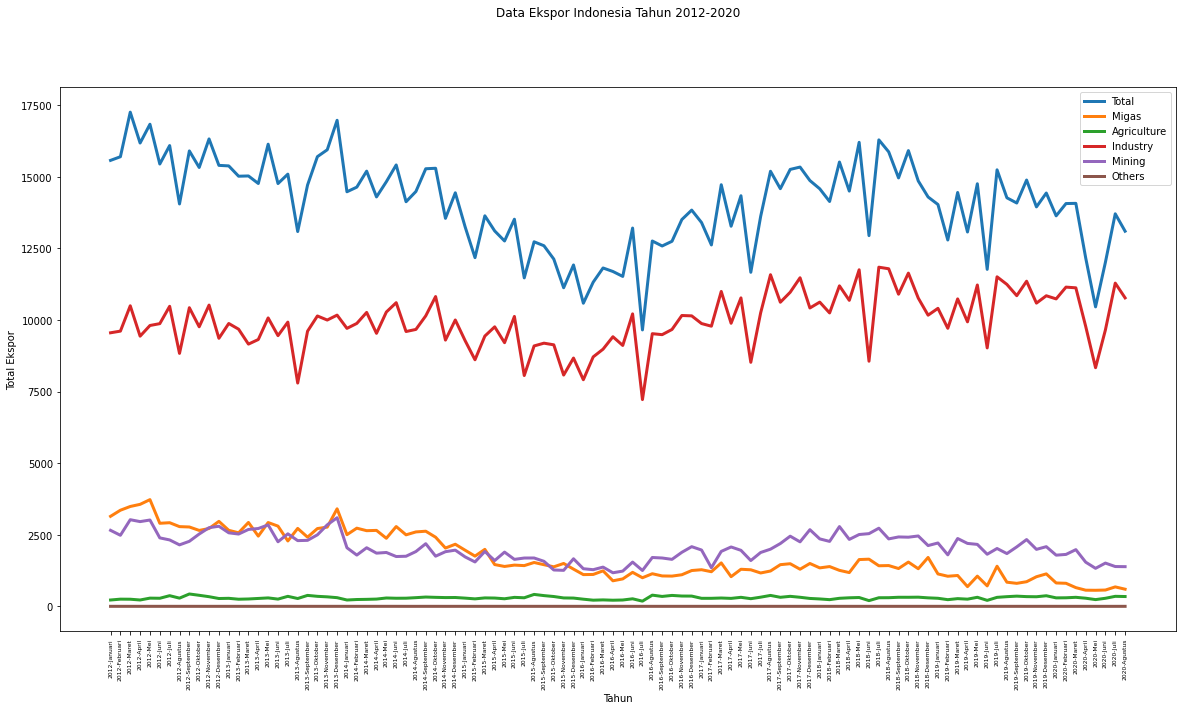

In [20]:
plt.figure(figsize=(20,10))

for i, column in enumerate(col_name,1):
    plt.plot(df['Tahun-Bulan'], df[column], label=column, linewidth=3.0)
    plt.xticks(rotation=90, fontsize=6)
    
    plt.ylabel('Total Ekspor')
    plt.xlabel('Tahun')
    plt.title('Data Ekspor Indonesia Tahun 2012-2020', y=1.12) 
    plt.legend()
    
    plt.savefig('Ekspor2012-2020.png')

##**Information**
As we can see in the bar graph above in **March 2012** total export Indonesia reach the highest number (17,251.52)

In [21]:
data_trans = pd.DataFrame(df)
data_trans.set_index('Tahun', inplace=True)
data_trans = data_trans.transpose()
data_trans

Tahun,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020,2020,2020
Bulan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,...,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus
Total,15568.1,15695.4,17251.5,16173.2,16829.5,15441.5,16085.1,14047,15898.1,15320,16316.9,15394,15375.5,15015.6,15024.6,14760.9,16133.4,14758.8,15087.9,13083.7,14706.8,15698.3,15938.6,16967.8,14472.3,14634.1,15192.6,14292.5,14823.6,15409.5,14124.1,14481.6,15275.9,15292.8,13544.7,14436.3,13244.9,12172.8,13634,13104.6,...,14333.9,11661.4,13611.1,15188,14580.2,15252.6,15334.7,14864.5,14576.3,14132.4,15510.6,14496.2,16198.3,12941.7,16284.7,15865.1,14956.4,15909.1,14851.7,14290.1,14028.1,12788.6,14447.8,13068.1,14751.9,11763.4,15238.4,14262,14080.1,14881.5,13944.5,14428.8,13632,14060.9,14067.9,12163.1,10454.3,12009.3,13702.7,13095.8
Migas,3142.63,3355.48,3486.1,3560.73,3724.89,2899.67,2919.69,2783.05,2770.49,2650.57,2717.05,2966.91,2653.65,2567.55,2928.28,2451.96,2926.25,2800.37,2282.58,2720.52,2414.68,2715.23,2766.84,3405.12,2501.65,2729.14,2641.29,2651.38,2375.69,2785.96,2496.32,2598.17,2622.61,2413.21,2035.38,2167.98,1958.97,1753.39,1988.89,1458.19,...,1294.39,1276.3,1164.97,1233.62,1455.01,1488.18,1295.76,1496.46,1342.67,1388.75,1256.15,1178.78,1633.1,1646.7,1416.51,1423.75,1320.25,1545.32,1312.92,1706.82,1131.25,1050.78,1077.41,688.11,1054.24,714.12,1400.5,842.84,803.03,859.95,1033.73,1133.28,816.17,805.04,653.36,563.95,560.6,569.36,679.03,598.73
Agriculture,221.47,250.95,248.48,221.99,286.61,282.11,372.26,286.69,431.36,385.59,336.97,273.21,280.27,248.52,257,275.69,294.52,252.87,349.45,273.35,382.37,349.76,331.73,302.98,221.27,238.47,244.14,253.56,291.68,282.64,284.62,303.26,324.59,313.91,306.03,309.09,287.02,261.22,294.48,289.68,...,314.93,267.44,320.16,381.19,315.89,349.46,316.65,275.74,258.11,233.5,281.03,298.54,307.98,199.8,300.32,301.79,316.88,316.27,320.14,296.65,281.69,233.22,269.4,250.79,316.27,208.55,314.03,337.86,356.24,339.45,335.04,369.84,295.87,299.04,315.13,283.88,235.48,281.31,349.66,342.64
Industry,9549.59,9607.61,10492,9431.6,9804.05,9868.83,10474,8830.38,10425.3,9758.87,10516.2,9356.88,9874.16,9675.26,9154.31,9315.23,10068.9,9449.87,9922.89,7795.08,9605.38,10136.6,9994.5,10166.5,9703.5,9876.12,10261,9529.86,10274.8,10600.9,9593.92,9666.75,10141,10814,9295.03,9996.91,9273.1,8607.79,9434.62,9757.83,...,10767.9,8519.1,10245.5,11576.6,10616.1,10965.1,11470.5,10415.6,10620.1,10242.5,11188.4,10681.7,11749.3,8556.81,11839.5,11784.7,10895.9,11633,10761.7,10164.5,10402.8,9705.88,10732.2,9931.92,11218.1,9021.41,11503.7,11238.5,10844.9,11350.3,10585.8,10842.2,10732.7,11143.9,11119.3,9772.92,8330.94,9648.4,11284,10768.4
Mining,2653.79,2480.69,3024.31,2958.06,3013.45,2390.1,2318.41,2146.38,2270.29,2524.57,2746.41,2796.45,2566.84,2523.71,2684.42,2717.38,2843.05,2254.58,2531.93,2294.43,2304.06,2496.32,2845.03,3092.53,2045.26,1789.73,2045.46,1857.08,1880.57,1739.23,1749.09,1913.21,2187.06,1751.08,1908.04,1961.87,1725.32,1549.91,1915.55,1598.36,...,1955.79,1598.39,1880.2,1996.01,2192.63,2449.33,2251.38,2676.11,2354.88,2267.15,2784.64,2336.85,2507.5,2537.99,2727.83,2354.48,2422.78,2413.98,2456.42,2121.51,2211.93,1798.01,2368.25,2196.65,2162.75,1818.76,2

In [22]:
b = data_trans.iloc[2:7,[2]]
b = b[2012]
b.tolist()

[3486.1, 248.48, 10491.95, 3024.31, 0.69]

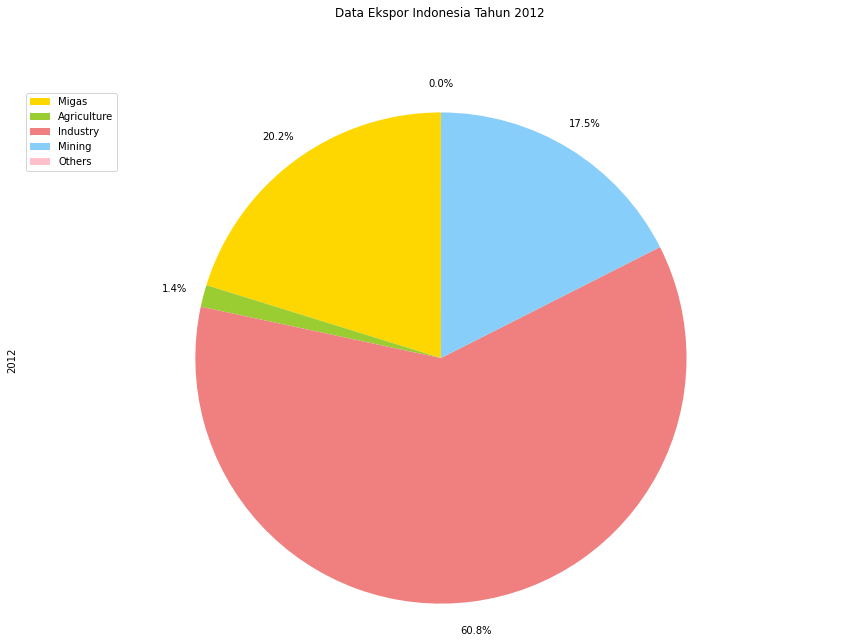

In [23]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']
b.plot(kind='pie', 
                        figsize=(15, 10),
                        autopct='%1.1f%%', 
                        startangle=90,      
                        labels=None,                 # turn off labels on pie chart
                        pctdistance=1.12,            # the ratio between the pie center and start of text label
                        colors=colors_list,
                       )

# scale the title up by 12% to match pctdistance
plt.title('Data Ekspor Indonesia Tahun 2012', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=b.index, loc='upper left') 

plt.show()

##**Information**
The highest total exports occurred in **March 2012** with export value of ** 17,251.51** and the highest sector at that time was in the **Industry** sector with an export value of **10492** or **60.8%** of total exports for the years and months.

In [24]:
byyears_df = df.groupby(['Tahun']).agg(Total = ('Total', 'sum'), Migas = ('Migas', 'sum'), Agriculture = ('Agriculture', 'sum'),
                                       Industry = ('Industry', 'sum'), Mining = ('Mining', 'sum'), Others = ('Others', 'sum')).reset_index()
index_years = byyears_df[byyears_df['Tahun'] == 2020].index 
byyears_df.drop(index_years, inplace=True)
byyears_df

,Tahun,Total,Migas,Agriculture,Industry,Mining,Others
0,2012,190020.28,36977.26,3597.69,118115.19,31322.91,7.22
1,2013,182551.81,32633.03,3598.51,115158.64,31154.28,7.37
2,2014,175979.98,30018.78,3373.26,119753.79,22827.68,6.48
3,2015,150366.29,18574.40,3726.49,108603.52,19455.99,5.91
4,2016,145186.21,13105.45,3406.96,110504.11,18164.79,4.86
5,2017,168828.19,15744.34,3670.99,125103.22,24303.83,5.80
6,2018,180012.67,17171.72,3431.01,130118.10,29286.01,5.84
7,2019,167683.01,11789.24,3612.38,127377.74,24896.97,6.63


In [25]:
byyears_df.set_index('Tahun', inplace = True)

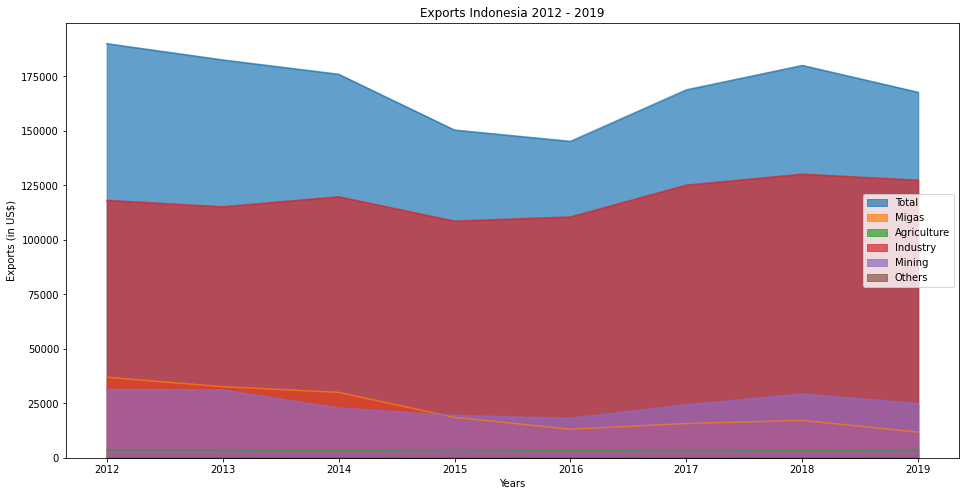

In [26]:
#plot

byyears_df.plot(kind = 'area', alpha = 0.7, figsize = (16, 8), stacked = False)

plt.title('Exports Indonesia 2012 - 2019')
plt.xlabel('Years')
plt.ylabel('Exports (in US$)')
plt.show()

## **Information**
Based on the graph above, it can be seen that Indonesia's export income has continued to decline from 2014 to 2016, then increased from 2017 to 2019, and decreased again in 2019. We can see that **Migas** sector continuously experience a decline in total revenue, but the **Industry** sector continues to experience an increase in revenue from year to year, although it had decreased in 2013 and 2015

In [27]:
df.reset_index(inplace=True)

In [28]:
bymonth = df.drop(df[df['Tahun'] == '2020'].index)

bymonth_df = bymonth.groupby(['Bulan'], sort = False).agg(Total = ('Total', 'sum'), Migas = ('Migas', 'sum'), Agriculture = ('Agriculture', 'sum'),
                                       Industry = ('Industry', 'sum'), Mining = ('Mining', 'sum'), Others = ('Others', 'sum'))
bymonth_df

,Total,Migas,Agriculture,Industry,Mining,Others
Bulan,,,,,,
Januari,124876.69,15933.59,2375.71,87938.63,18624.30,4.40
Februari,122432.51,15972.05,2260.57,87346.91,16848.29,4.72
Maret,131659.73,16787.03,2425.69,92352.09,20090.22,4.74
April,123018.04,14481.05,2366.14,87714.66,18451.37,4.79
Mei,127796.95,15919.82,2533.52,90525.15,18813.28,5.18
Juni,120705.76,15319.74,2351.55,85995.80,17033.93,4.73
Juli,125249.22,14780.08,2771.17,90138.30,17555.06,4.62
Agustus,125503.17,14870.18,3034.19,90268.98,17325.63,4.15
September,114665.54,13901.11,2848.37,81199.92,16712.22,3.90


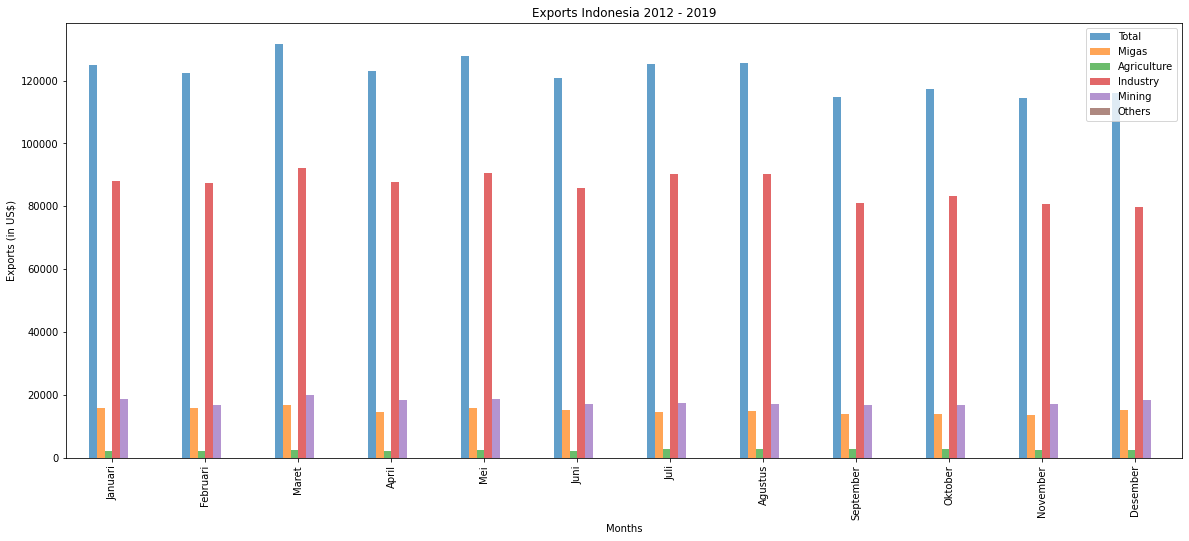

In [29]:
#plot

bymonth_df.plot(kind = 'bar', alpha = 0.7, figsize = (20, 8), stacked = False)

plt.title('Exports Indonesia 2012 - 2019')
plt.xlabel('Months')
plt.ylabel('Exports (in US$)')
plt.show()

##**Information**
As we can see in the bar graph above based on the months in all years, we know that in **March (131,659.73)** Indonesia reach the highest total export income. All sector reach the highest export income in **March** (**Migas sector (16,787.03)**, **Industry sector (92,352.09)**, **Mining sector (20,090.22)**, and **Others sector (4.74)**), except **Agriculture sector** only reach **2,425.69**.

## **Correlation Matrix**
After that we'll use the correlation matrix to find the best correlation between exports income and the sector.

In [30]:
# Check data correlation
df.corr()

,Tahun,Total,Migas,Agriculture,Industry,Mining,Others
Tahun,1.000000,-0.349740,-0.889201,0.005059,0.378017,-0.348927,-0.289762
Total,-0.349740,1.000000,0.630079,0.262718,0.658116,0.841006,0.424227
Migas,-0.889201,0.630079,1.000000,-0.069008,-0.134687,0.596794,0.396955
Agriculture,0.005059,0.262718,-0.069008,1.000000,0.406712,0.066503,-0.021809
Industry,0.378017,0.658116,-0.134687,0.406712,1.000000,0.357119,0.176298
Mining,-0.348927,0.841006,0.596794,0.066503,0.357119,1.000000,0.348992
Others,-0.289762,0.424227,0.396955,-0.021809,0.176298,0.348992,1.000000


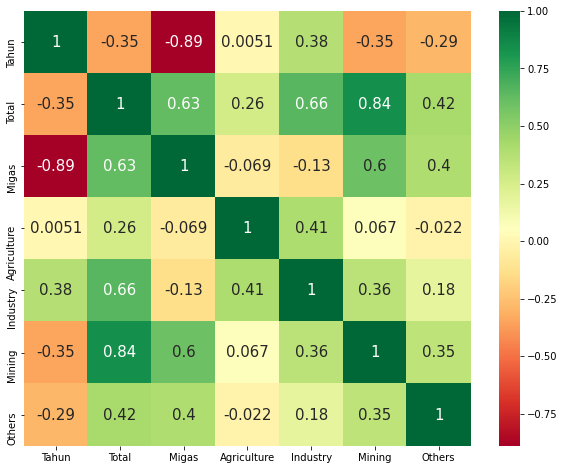

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

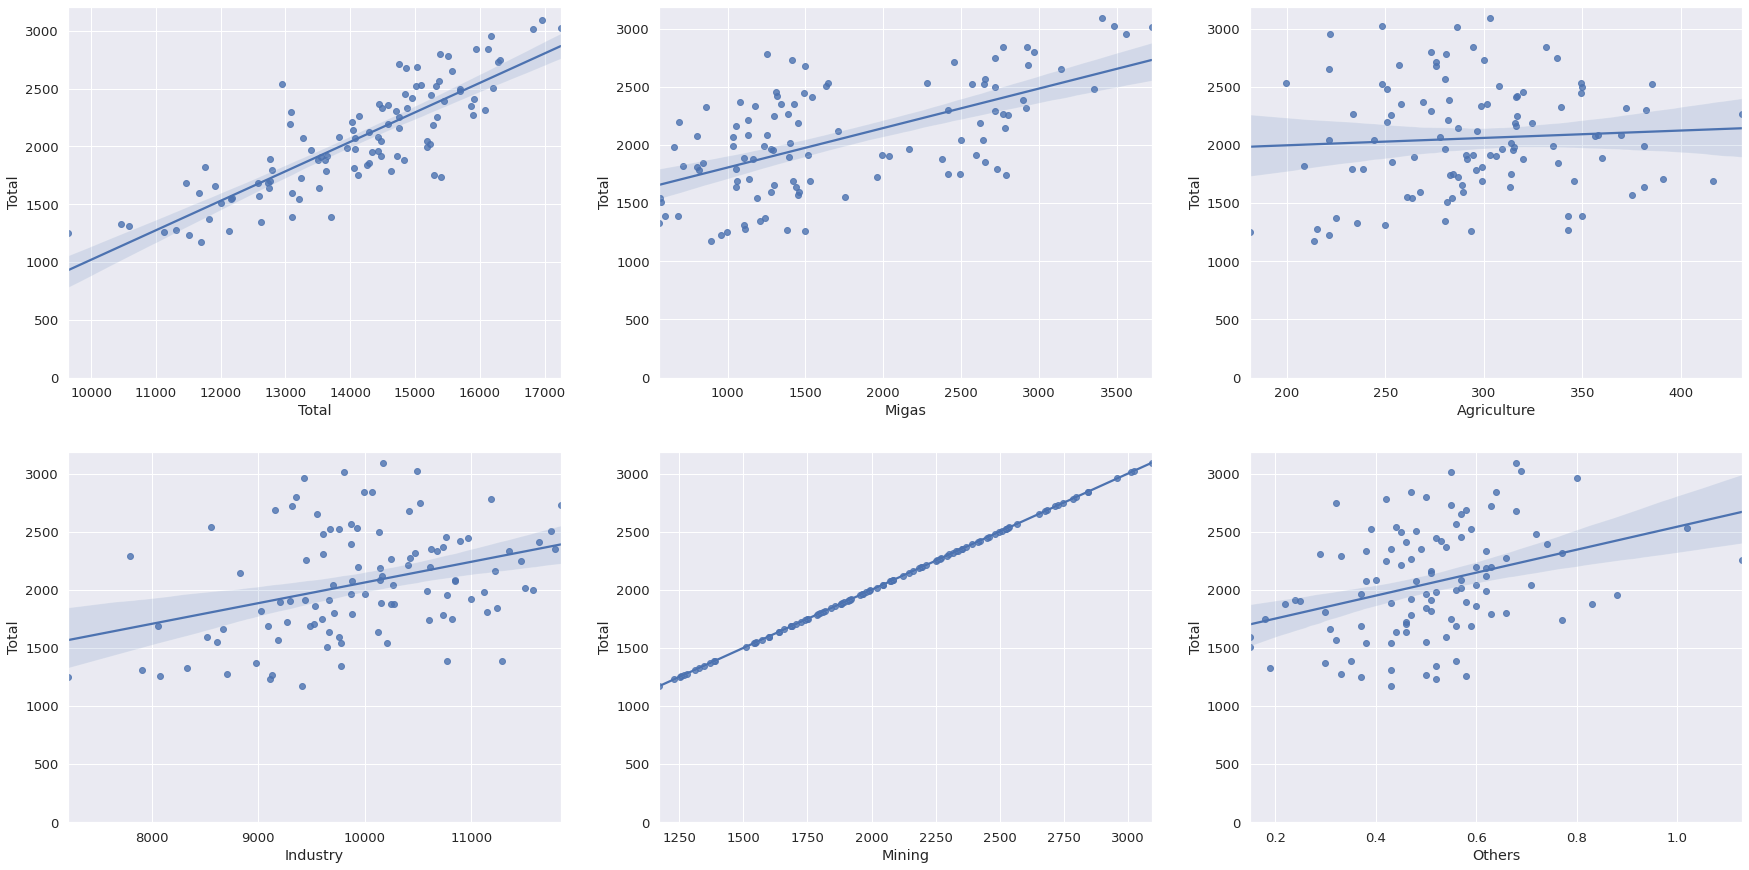

In [32]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 15))

for i, column in enumerate(col_name,1):
    
    plt.subplot(2, 3, i)
    sns.regplot(x=column, y='Mining', data=df)
    plt.ylim(0,)

    plt.ylabel('Total')
    plt.xlabel(f'{column}')

##**Information**
As we can see in heatmap graph above, we can be conclude that the sector with **The highest correlation** with the increase total exports in Indonesia is the **Mining sector** with correlation value of **0.84** and it can be seen from the **distribution (regplot)** of data **Mining sector** to **Total** isn't too far away.

# **Data Modeling**
After we analyze and visualize the data, we'll try to modelling the data using machine learning. We'll try to predict the trend using **Linear Regression Model**, **Polynomial Regression Model**, and **Multilinear Regression**.

## **Total Export Based on Mining Sector as Predictor Value**

## **Linear Regression Model**

(8000.0, 17640.01086250182)

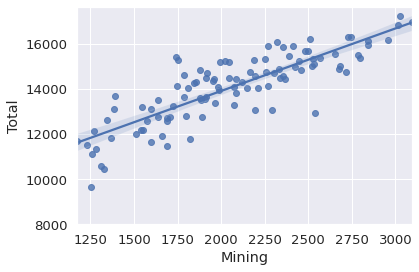

In [33]:
#sns plot
sns.regplot(x='Mining', y='Total', data=df)
plt.ylim(8000,)

In [34]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [35]:
#Start with Linear Regression
from sklearn import linear_model

#train test data
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Mining']])
y_train = np.asanyarray(train[['Total']])
regr.fit (x_train, y_train)

#looking for coef and intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[2.84243944]]
Intercept:  [8161.90297063]


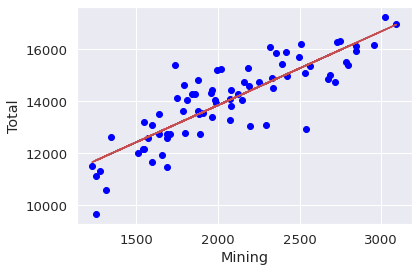

In [36]:
#plotting grafik
plt.scatter(train.Mining, train.Total,  color='blue')
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], '-r')
plt.xlabel("Mining")
plt.ylabel("Total")
plt.show()

In [37]:
from sklearn.metrics import r2_score

x_test = np.asanyarray(test[['Mining']])
y_test = np.asanyarray(test[['Total']])
yhat = regr.predict(x_test)
yhat

array([[15705.14032714],
       [15213.1140604 ],
       [16727.45209546],
       [14615.06480262],
       [15337.84030295],
       [15335.39580503],
       [14711.05398244],
       [13975.43065586],
       [13975.99914374],
       [13600.08652805],
       [13139.24182195],
       [13066.02058202],
       [13606.73783634],
       [11769.86819824],
       [12055.64705935],
       [11493.95260198],
       [13613.9860569 ],
       [15123.97515962],
       [14561.31427284],
       [14855.50675469],
       [14606.13954278],
       [15144.12805524],
       [14449.18003701],
       [14893.51016998],
       [13331.61812312],
       [11934.04750018],
       [12111.92736022],
       [12100.01753898]])

In [38]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(((yhat - y_test) ** 2).mean()))
print("R2-score: %.2f" % r2_score(yhat , y_test) )

Mean absolute error: 630.20
Root Mean Squared Error (RMSE): 848.87
R2-score: 0.60


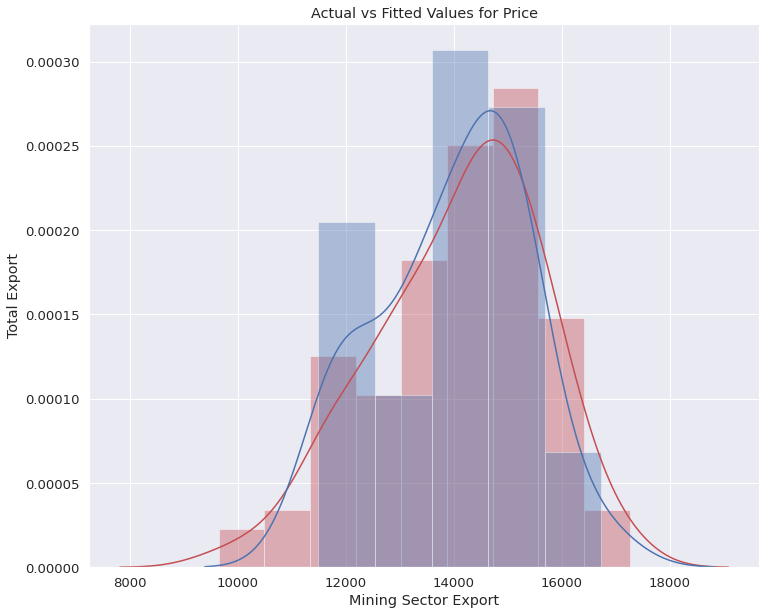

In [39]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(df['Total'], hist=True, color="r", label="Actual Value")
sns.distplot(yhat, hist=True, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Mining Sector Export')
plt.ylabel('Total Export')

plt.show()
plt.close()

## **Information**
As we can see, when we tried to modeling **Mining Sector** and **Total** export income using **Linear Regression** we know that it has **mean absolute error of 750.01**, **Root Mean Squared Error (RMSE) 976.09** and **R2-score 0.41**. Since **Mean absolute error** and **Root Mean Squared Error (RMSE)** are large, as well as **R2-score** are small, we can conclude that this model is not very suitable for our data.

# **Polynomial Regression**

In [40]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(1000, 3500, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Total')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Export Total')

    plt.show()
    plt.close()

In [41]:
x = df['Mining']
y = df['Total']

In [42]:
f = np.polyfit(x, y, 5)
p = np.poly1d(f)
print(p)

            5             4             3           2
-3.722e-13 x + 5.726e-09 x - 3.031e-05 x + 0.07178 x - 74.21 x + 3.83e+04


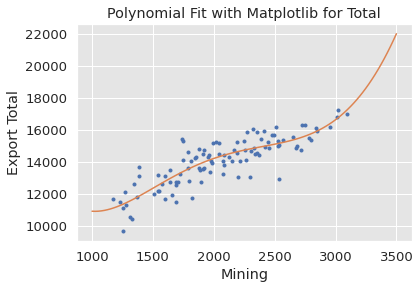

array([-3.72230493e-13,  5.72557104e-09, -3.03096089e-05,  7.17797241e-02,
       -7.42143465e+01,  3.83046743e+04])

In [43]:
PlotPolly(p, x, y, 'Mining')
np.polyfit(x, y, 5)

In [44]:
from sklearn.metrics import mean_squared_error 
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y, p(x))))
print("R2-score: %.2f" % r2_score(y , p(x)) )

Root Mean Squared Error (RMSE): 789.99
R2-score: 0.74


## **Information**
As we can see, when we tried to modeling **Mining Sector** and **Total** export income using **Polynomial Regression** we know that it has **Root Mean Squared Error (RMSE) 789.99** and **R2-score 0.74**. Since **Root Mean Squared Error (RMSE)** is smaller than **Linear Reggresion**, as well as **R2-score** is larger than **Linear Regression**, we can conclude that this model is more suitable for our data, but not the best one.

## **Total Export Based on Industry Sector as Predictor Value**

(0.0, 17631.621)

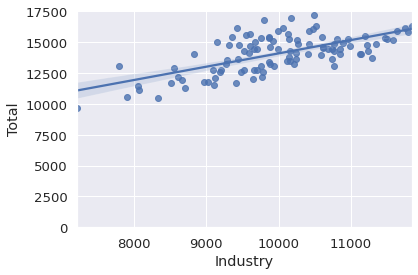

In [45]:
#sns plot
sns.regplot(x='Industry', y='Total', data=df)
plt.ylim(0,)

In [46]:
#Start with Linear Regression
from sklearn import linear_model

#tran test data
regr1 = linear_model.LinearRegression()
x_train1 = np.asanyarray(train[['Industry']])
y_train1 = np.asanyarray(train[['Total']])
regr1.fit (x_train1, y_train1)

#looking for coef and intercept
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[1.08997021]]
Intercept:  [3178.18822372]


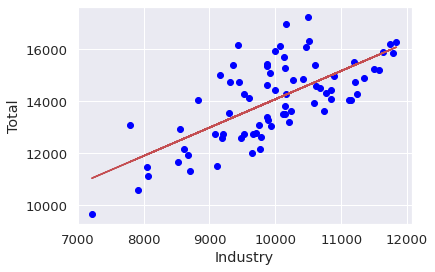

In [47]:
#plotting grafik
plt.scatter(train.Industry, train.Total,  color='blue')
plt.plot(x_train1, regr1.coef_[0][0]*x_train1 + regr1.intercept_[0], '-r')
plt.xlabel("Industry")
plt.ylabel("Total")
plt.show()

In [48]:
x_test1 = np.asanyarray(test[['Industry']])
y_test1 = np.asanyarray(test[['Total']])
yhat1 = regr1.predict(x_test1)
yhat1

array([[13586.95680377],
       [13650.19687512],
       [13864.3106224 ],
       [14541.46551261],
       [13815.06576849],
       [13723.93335956],
       [13647.76624156],
       [13754.71411818],
       [14362.41610686],
       [13714.65771311],
       [14965.13693171],
       [13285.59094149],
       [13461.64292918],
       [13128.99492199],
       [12963.40664829],
       [13436.19212486],
       [15160.00180514],
       [15129.79873073],
       [15680.71327168],
       [14753.81350816],
       [14342.22985865],
       [14908.08789112],
       [14516.88668447],
       [14875.95556945],
       [13011.25634033],
       [12258.66461216],
       [15477.39022945],
       [14915.4015912 ]])

In [49]:
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(((yhat1 - y_test1) ** 2).mean()))
print("R2-score: %.2f" % r2_score(yhat1 , y_test1) )

Root Mean Squared Error (RMSE): 1242.43
R2-score: -1.19


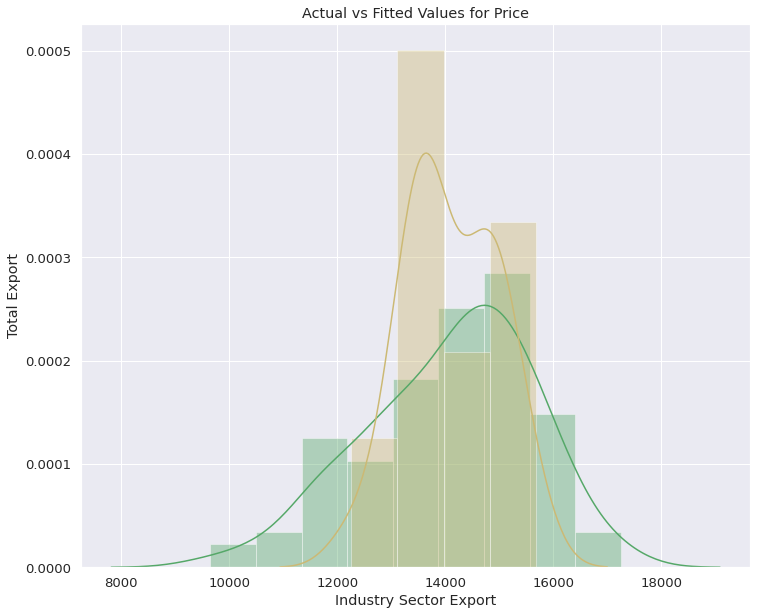

In [50]:
plt.figure(figsize=(12,10))

ax1 = sns.distplot(df['Total'], hist=True, color="g", label="Actual Value")
sns.distplot(yhat1, hist=True, color="y", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Industry Sector Export')
plt.ylabel('Total Export')

plt.show()
plt.close()

## **Information**
As we can see, when we tried to modeling **Industry Sector** and **Total** export income using **Linear Regression** we know that it has **Root Mean Squared Error (RMSE) 990.11** and **R2-score -0.02**. Since **Root Mean Squared Error (RMSE)** is large, as well as **R2-score** is small (minus), we can conclude that this model is not suitable for our data.

# **Polynomial Regression**

In [51]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(1000, 13000, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Total')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Export Total')

    plt.show()
    plt.close()

In [52]:
x1 = df['Industry']
y1 = df['Total']

In [53]:
f1 = np.polyfit(x1, y1, 5)
p1 = np.poly1d(f1)
print(p1)

           5             4             3          2
1.099e-13 x - 5.146e-09 x + 9.568e-05 x - 0.8828 x + 4044 x - 7.352e+06


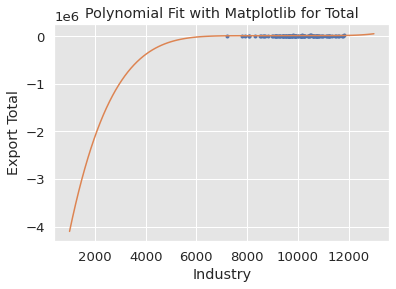

array([ 1.09885776e-13, -5.14616543e-09,  9.56752974e-05, -8.82752431e-01,
        4.04393752e+03, -7.35172062e+06])

In [54]:
PlotPolly(p1, x1, y1, 'Industry')
np.polyfit(x1, y1, 5)

In [55]:
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(y1, p1(x1))))
print("R2-score: %.2f" % r2_score(y1 , p1(x1)))

Root Mean Squared Error (RMSE): 1059.54
R2-score: 0.53


## **Information**
As we can see, when we tried to modeling **Industry Sector** and **Total** export income using **Polynomial Regression** we know that it has **Root Mean Squared Error (RMSE) 1059.54** and **R2-score 0.53**. Since **Root Mean Squared Error (RMSE)** is large, as well as **R2-score** is small , we can conclude that this model is not suitable for our data.

## **Multilinear Regression for Total Export**

In [56]:
all_feature = df[['Agriculture', 'Industry', 'Mining', 'Others']]

In [57]:
regr.fit(all_feature, df['Total'])
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [2.22741403e+00 6.09928581e-01 2.17026581e+00 1.21957308e+03]
Intercept:  2238.9862167891697


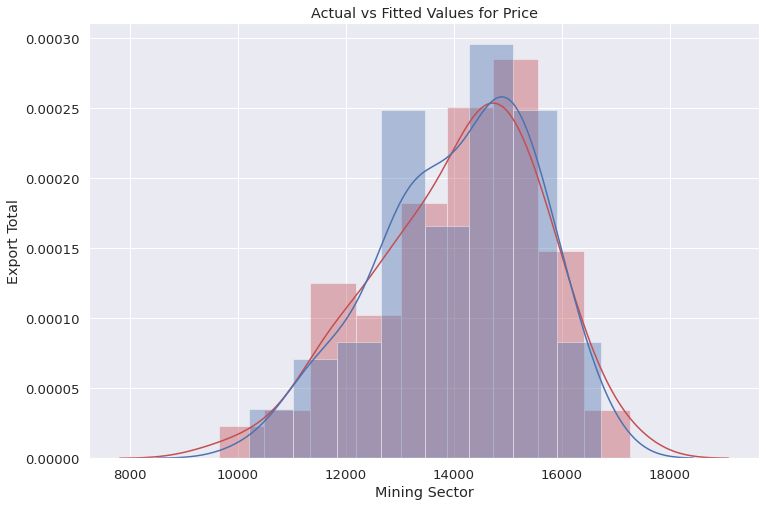

In [58]:
yhat1 = regr.predict(all_feature)
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(df['Total'], hist=True, color="r", label="Actual Value")
sns.distplot(yhat1, hist=True, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Mining Sector')
plt.ylabel('Export Total')

plt.show()
plt.close()

In [59]:
from sklearn.metrics import mean_squared_error

# Find the R^2
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(mean_squared_error(df['Total'], yhat1)))
print('The R-square is: ', regr.score(all_feature, df['Total']))

Root Mean Squared Error (RMSE): 550.52
The R-square is:  0.8718373592460555


## **Information**
As we can see, when we tried to modeling **All Sector**, except for **Migas sector** and **Total** export income using **Multilinear Regression** we know that it has **Root Mean Squared Error (RMSE) 550.52** and **R2-score 0.87**. Since **Root Mean Squared Error (RMSE)** is the smallest, as well as **R2-score** is the largest than other methods, we can conclude that **Multilinear Regression** is the best model for our data.